#### A. IMPORT ESSENTIAL LIBRARIES & LOAD DATASET

In [1]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

In [2]:
# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Data Science Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [4]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load Dataset
df_processed = pd.read_csv("./data/processed_data/df_processed.csv")

In [6]:
# Dataset Copy
df = df_processed.copy()

In [7]:
# Final Submissions: Retrieve Test IDs
id_df = df[df['Source']=='test']['ID']

In [8]:
# Test ID DataFrame
Submission = pd.DataFrame(id_df).copy()

In [9]:
# Submission File
Submission.set_index('ID',inplace=True)

#### B. DATASET EXPLORATION & PREPROCESSING

In [10]:
# Dataset: Create Dummies
df_dummies = pd.get_dummies(df, drop_first=True)

In [11]:
# Dataset Split: Train/Test
df_train = df_dummies[df_dummies['Source_train']==1].copy()
df_test = df_dummies[df_dummies['Source_train']==0].copy()

In [12]:
# Dataset Train: Drop Columns
df_train.drop(columns=["Unnamed: 0","ID","Source_train"],inplace=True)

In [13]:
# Dataset Test: Drop Columns
df_test.drop(columns=["Unnamed: 0","ID","Source_train","Overall_Experience"],inplace=True)

In [14]:
# Dataset: Train Head
df_train.head(3)

,Overall_Experience,Travel_Distance,Age_Modified,Departure_Delay_in_Mins_Modified,Arrival_Delay_in_Mins_Modified,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,...,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Online_Boarding_Unknown,Gender_Male,Gender_Unknown,Customer_Type_Loyal Customer,Customer_Type_Unknown,Travel_Class_Eco,Type_Travel_Modified_Personal Travel
0,0.0,272,52.0,0.0,5.0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,0.0,2200,48.0,9.0,0.0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,1,1
2,1.0,1061,43.0,77.0,119.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
# Dataset: Test Head
df_test.tail(3)

,Travel_Distance,Age_Modified,Departure_Delay_in_Mins_Modified,Arrival_Delay_in_Mins_Modified,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Comfort_Unknown,...,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Online_Boarding_Unknown,Gender_Male,Gender_Unknown,Customer_Type_Loyal Customer,Customer_Type_Unknown,Travel_Class_Eco,Type_Travel_Modified_Personal Travel
129978,1180,22.0,0.0,0.0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
129979,420,67.0,23.0,16.0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1
129980,1680,20.0,0.0,0.0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,1,1


In [16]:
# Datasets Shape
print('Datasets Shape')
print("-----")
print("Train Data Shape: {0}".format(df_train.shape))
print("Test Data Shape: {0}".format(df_test.shape))

Datasets Shape
-----
Train Data Shape: (94379, 95)
Test Data Shape: (35602, 94)


#### C. MODEL 1: RANDOM FOREST (GRIDSEARCH)

In [17]:
# Set X/y
X = df_train.drop("Overall_Experience", axis=1)
y = df_train["Overall_Experience"]

In [18]:
# Import Train, Test & Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
# Load Random Forest
rf_model = RandomForestClassifier()

In [20]:
# Random Forest: GridSearch Params
n_estimators = np.arange(64,201,45)
max_features = np.arange(2,5,1)
bootstrap = [True,False]
oob_score = [True,False]

rf_param_grid = {'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}

In [21]:
# Random Forest GridSearch
rf_grid = GridSearchCV(rf_model,rf_param_grid,verbose=2)

In [22]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   3.0s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   3.4s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   3.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   3.2s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   3.4s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   2.5s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   2.6s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   2.7s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   2.9s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   2.9s
[CV

[CV] END bootstrap=True, max_features=4, n_estimators=64, oob_score=False; total time=   3.3s
[CV] END bootstrap=True, max_features=4, n_estimators=64, oob_score=False; total time=   3.2s
[CV] END bootstrap=True, max_features=4, n_estimators=64, oob_score=False; total time=   3.2s
[CV] END bootstrap=True, max_features=4, n_estimators=109, oob_score=True; total time=   6.4s
[CV] END bootstrap=True, max_features=4, n_estimators=109, oob_score=True; total time=   5.8s
[CV] END bootstrap=True, max_features=4, n_estimators=109, oob_score=True; total time=   6.6s
[CV] END bootstrap=True, max_features=4, n_estimators=109, oob_score=True; total time=   6.4s
[CV] END bootstrap=True, max_features=4, n_estimators=109, oob_score=True; total time=   5.9s
[CV] END bootstrap=True, max_features=4, n_estimators=109, oob_score=False; total time=   5.0s
[CV] END bootstrap=True, max_features=4, n_estimators=109, oob_score=False; total time=   5.1s
[CV] END bootstrap=True, max_features=4, n_estimators=109,

[CV] END bootstrap=False, max_features=3, n_estimators=109, oob_score=False; total time=   6.4s
[CV] END bootstrap=False, max_features=3, n_estimators=109, oob_score=False; total time=   6.5s
[CV] END bootstrap=False, max_features=3, n_estimators=109, oob_score=False; total time=   6.3s
[CV] END bootstrap=False, max_features=3, n_estimators=109, oob_score=False; total time=   6.5s
[CV] END bootstrap=False, max_features=3, n_estimators=109, oob_score=False; total time=   6.3s
[CV] END bootstrap=False, max_features=3, n_estimators=154, oob_score=True; total time=   0.1s
[CV] END bootstrap=False, max_features=3, n_estimators=154, oob_score=True; total time=   0.1s
[CV] END bootstrap=False, max_features=3, n_estimators=154, oob_score=True; total time=   0.1s
[CV] END bootstrap=False, max_features=3, n_estimators=154, oob_score=True; total time=   0.1s
[CV] END bootstrap=False, max_features=3, n_estimators=154, oob_score=True; total time=   0.1s
[CV] END bootstrap=False, max_features=3, n_e

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': array([2, 3, 4]),
                         'n_estimators': array([ 64, 109, 154, 199]),
                         'oob_score': [True, False]},
             verbose=2)

In [23]:
# Random Forest GridSearchBest Params
rf_grid.best_params_

{'bootstrap': False,
 'max_features': 4,
 'n_estimators': 199,
 'oob_score': False}

In [24]:
# Random Forest GridSearch Predictions
y_pred_train = rf_grid.predict(X_train)
y_pred_test = rf_grid.predict(X_test)

Random Forest GridSearch: Train
-----


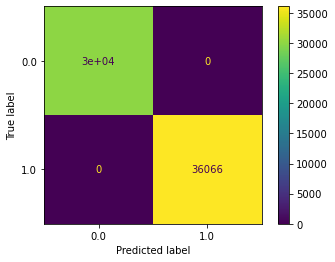

In [25]:
# Confusion Matrix: Random Forest GridSearch
print('Random Forest GridSearch: Train')
print("-----")
plot_confusion_matrix(rf_grid,X_train,y_train);

In [26]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29999
         1.0       1.00      1.00      1.00     36066

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



Random Forest GridSearch: Test
-----


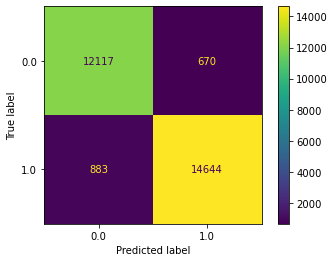

In [27]:
# Confusion Matrix: Random Forest GridSearch
print('Random Forest GridSearch: Test')
print("-----")
plot_confusion_matrix(rf_grid,X_test,y_test);

In [28]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     12787
         1.0       0.96      0.94      0.95     15527

    accuracy                           0.95     28314
   macro avg       0.94      0.95      0.94     28314
weighted avg       0.95      0.95      0.95     28314



In [29]:
# Re-Load Random Forest GridSearch
rf_model_final = RandomForestClassifier()

In [30]:
# Random Forest Final: GridSearch Params
n_estimators = np.arange(64,201,45)
max_features = np.arange(2,5,1)
bootstrap = [True,False]
oob_score = [True,False]

rf_param_grid = {'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}

In [31]:
# Random Forest GridSearch
rf_grid_final = GridSearchCV(rf_model_final,rf_param_grid,verbose=2)

In [32]:
# Fit Model To All Data
rf_grid_final.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   4.7s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   4.8s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   4.6s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   4.6s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   4.8s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   3.8s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   3.8s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   3.9s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   3.8s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   3.8s
[CV

[CV] END bootstrap=True, max_features=4, n_estimators=64, oob_score=False; total time=   4.6s
[CV] END bootstrap=True, max_features=4, n_estimators=64, oob_score=False; total time=   4.7s
[CV] END bootstrap=True, max_features=4, n_estimators=64, oob_score=False; total time=   4.7s
[CV] END bootstrap=True, max_features=4, n_estimators=109, oob_score=True; total time=   9.5s
[CV] END bootstrap=True, max_features=4, n_estimators=109, oob_score=True; total time=   9.6s
[CV] END bootstrap=True, max_features=4, n_estimators=109, oob_score=True; total time=   9.5s
[CV] END bootstrap=True, max_features=4, n_estimators=109, oob_score=True; total time=   9.7s
[CV] END bootstrap=True, max_features=4, n_estimators=109, oob_score=True; total time=   9.9s
[CV] END bootstrap=True, max_features=4, n_estimators=109, oob_score=False; total time=   8.8s
[CV] END bootstrap=True, max_features=4, n_estimators=109, oob_score=False; total time=   7.9s
[CV] END bootstrap=True, max_features=4, n_estimators=109,

[CV] END bootstrap=False, max_features=3, n_estimators=109, oob_score=False; total time=   9.6s
[CV] END bootstrap=False, max_features=3, n_estimators=109, oob_score=False; total time=   9.5s
[CV] END bootstrap=False, max_features=3, n_estimators=109, oob_score=False; total time=   9.5s
[CV] END bootstrap=False, max_features=3, n_estimators=109, oob_score=False; total time=   9.5s
[CV] END bootstrap=False, max_features=3, n_estimators=109, oob_score=False; total time=   9.5s
[CV] END bootstrap=False, max_features=3, n_estimators=154, oob_score=True; total time=   0.1s
[CV] END bootstrap=False, max_features=3, n_estimators=154, oob_score=True; total time=   0.1s
[CV] END bootstrap=False, max_features=3, n_estimators=154, oob_score=True; total time=   0.1s
[CV] END bootstrap=False, max_features=3, n_estimators=154, oob_score=True; total time=   0.1s
[CV] END bootstrap=False, max_features=3, n_estimators=154, oob_score=True; total time=   0.1s
[CV] END bootstrap=False, max_features=3, n_e

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': array([2, 3, 4]),
                         'n_estimators': array([ 64, 109, 154, 199]),
                         'oob_score': [True, False]},
             verbose=2)

In [33]:
# Final Random Forest GridSearch Best Params
rf_grid_final.best_params_

{'bootstrap': False,
 'max_features': 4,
 'n_estimators': 199,
 'oob_score': False}

In [34]:
# Random Forest GridSearch Final Predictions
y_pred_final = rf_grid_final.predict(df_test)

In [35]:
# Random Forest GridSearch Final Predictions: Dataframe
y_pred_final = pd.DataFrame(y_pred_final).copy()

In [36]:
# Rename Column
y_pred_final.rename(columns={0:'Overall_Experience'},inplace=True)

In [37]:
# Random Forest GridSearch: Final Submission
submit_random_forest_grid = Submission.copy()

In [38]:
# Random Forest GridSearch: Final Submission: Combined
submit_random_forest_grid['Overall_Experience'] = y_pred_final['Overall_Experience'].values

In [39]:
# Export Submission: Random Forest GridSearch
submit_random_forest_grid.to_csv("./data/submission_data/submission_random_forest_grid.csv")

#### D. MODEL 2: XGBBoost (GRIDSEARCH)

In [40]:
# Re-Set X/y
X = df_train.drop("Overall_Experience", axis=1)
y = df_train["Overall_Experience"]

In [41]:
# Import Train, Test & Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
# Load XGB
xgb_model = XGBClassifier(random_state=1, eval_metric='logloss')

In [43]:
# XGB: GridSearch Params
n_estimators = np.arange(0,35,5)
reg_alpha = np.arange(0,35,5)
reg_lambda = np.arange(0,35,5)

xgb_param_grid = {'n_estimators':n_estimators,'reg_alpha':reg_alpha, 'reg_lambda':reg_lambda}

In [44]:
# XGB GridSearch
xgb_grid = GridSearchCV(xgb_model,xgb_param_grid,verbose=2)

In [45]:
# Fit Model To Train Data
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 343 candidates, totalling 1715 fits
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=0; total time=   0.2s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=0; total time=   0.2s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=0; total time=   0.2s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=0; total time=   0.2s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=0; total time=   0.2s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=0, reg_lambda=10; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=0

[CV] END ........n_estimators=0, reg_alpha=10, reg_lambda=30; total time=   0.2s
[CV] END ........n_estimators=0, reg_alpha=10, reg_lambda=30; total time=   0.2s
[CV] END ........n_estimators=0, reg_alpha=10, reg_lambda=30; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=0; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=0; total time=   0.1s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=0; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=0; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=0; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=5; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=5; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=5; total time=   0.1s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=5; total time=   0.2s
[CV] END .........n_estimato

[CV] END ........n_estimators=0, reg_alpha=25, reg_lambda=30; total time=   0.2s
[CV] END ........n_estimators=0, reg_alpha=25, reg_lambda=30; total time=   0.2s
[CV] END ........n_estimators=0, reg_alpha=25, reg_lambda=30; total time=   0.2s
[CV] END ........n_estimators=0, reg_alpha=25, reg_lambda=30; total time=   0.2s
[CV] END ........n_estimators=0, reg_alpha=25, reg_lambda=30; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=30, reg_lambda=0; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=30, reg_lambda=0; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=30, reg_lambda=0; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=30, reg_lambda=0; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=30, reg_lambda=0; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=30, reg_lambda=5; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=30, reg_lambda=5; total time=   0.2s
[CV] END .........n_estimato

[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=25; total time=   0.5s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=25; total time=   0.5s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=25; total time=   0.6s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=30; total time=   0.5s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=30; total time=   0.5s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=30; total time=   0.6s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=30; total time=   0.6s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=30; total time=   0.5s
[CV] END .........n_estimators=5, reg_alpha=10, reg_lambda=0; total time=   0.5s
[CV] END .........n_estimators=5, reg_alpha=10, reg_lambda=0; total time=   0.5s
[CV] END .........n_estimators=5, reg_alpha=10, reg_lambda=0; total time=   0.5s
[CV] END .........n_estimators=5, reg_alpha=10, reg_lambda=0; total time=   0.5s
[CV] END .........n_estimato

[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=20; total time=   0.5s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=25; total time=   0.5s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=25; total time=   0.5s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=25; total time=   0.5s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=25; total time=   0.5s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=25; total time=   0.5s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=30; total time=   0.5s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=30; total time=   0.5s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=30; total time=   0.5s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=30; total time=   0.5s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=30; total time=   0.5s
[CV] END .........n_estimators=5, reg_alpha=25, reg_lambda=0; total time=   0.5s
[CV] END .........n_estimato

[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=20; total time=   0.8s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=20; total time=   0.8s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=20; total time=   0.8s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=20; total time=   0.8s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=25; total time=   0.8s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=25; total time=   0.8s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=25; total time=   0.8s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=25; total time=   0.9s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=25; total time=   0.8s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=30; total time=   0.8s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=30; total time=   0.8s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=30; total time=   0.8s
[CV] END ........n_estimator

[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=15; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=15; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=20; total time=   0.9s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=20; total time=   0.9s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=20; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=20; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=20; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=25; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=25; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=25; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=25; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=25; total time=   0.8s
[CV] END .......n_estimators

[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=15; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=15; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=15; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=15; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=15; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=20; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=20; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=20; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=20; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=20; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=25; total time=   0.8s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=25; total time=   0.8s
[CV] END .......n_estimators

[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=10; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=10; total time=   1.1s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=10; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=15; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=15; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=15; total time=   1.3s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=15; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=15; total time=   1.4s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=20; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=20; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=20; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=20; total time=   1.3s
[CV] END .......n_estimators

[CV] END ........n_estimators=15, reg_alpha=25, reg_lambda=5; total time=   1.1s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=10; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=10; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=10; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=10; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=10; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=15; total time=   1.1s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=15; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=15; total time=   1.2s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=15; total time=   1.3s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=15; total time=   1.1s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=20; total time=   1.1s
[CV] END .......n_estimators

[CV] END .........n_estimators=20, reg_alpha=5, reg_lambda=5; total time=   1.4s
[CV] END .........n_estimators=20, reg_alpha=5, reg_lambda=5; total time=   1.4s
[CV] END .........n_estimators=20, reg_alpha=5, reg_lambda=5; total time=   1.5s
[CV] END .........n_estimators=20, reg_alpha=5, reg_lambda=5; total time=   1.4s
[CV] END ........n_estimators=20, reg_alpha=5, reg_lambda=10; total time=   1.4s
[CV] END ........n_estimators=20, reg_alpha=5, reg_lambda=10; total time=   1.5s
[CV] END ........n_estimators=20, reg_alpha=5, reg_lambda=10; total time=   1.4s
[CV] END ........n_estimators=20, reg_alpha=5, reg_lambda=10; total time=   1.4s
[CV] END ........n_estimators=20, reg_alpha=5, reg_lambda=10; total time=   1.4s
[CV] END ........n_estimators=20, reg_alpha=5, reg_lambda=15; total time=   1.4s
[CV] END ........n_estimators=20, reg_alpha=5, reg_lambda=15; total time=   1.4s
[CV] END ........n_estimators=20, reg_alpha=5, reg_lambda=15; total time=   1.7s
[CV] END ........n_estimator

[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=0; total time=   1.4s
[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=0; total time=   1.5s
[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=5; total time=   1.5s
[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=5; total time=   1.7s
[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=5; total time=   1.5s
[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=5; total time=   1.5s
[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=5; total time=   1.5s
[CV] END .......n_estimators=20, reg_alpha=20, reg_lambda=10; total time=   1.4s
[CV] END .......n_estimators=20, reg_alpha=20, reg_lambda=10; total time=   1.5s
[CV] END .......n_estimators=20, reg_alpha=20, reg_lambda=10; total time=   1.4s
[CV] END .......n_estimators=20, reg_alpha=20, reg_lambda=10; total time=   1.4s
[CV] END .......n_estimators=20, reg_alpha=20, reg_lambda=10; total time=   1.5s
[CV] END .......n_estimators

[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=0; total time=   1.7s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=0; total time=   1.8s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=0; total time=   2.0s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=0; total time=   1.9s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=0; total time=   1.8s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=5; total time=   1.8s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=5; total time=   1.9s
[CV] END ........n_estimators=25, reg_alpha=0, reg_lambda=10; total time=   1.9s
[CV] END ........n_estimators=25, reg_alpha=0, reg_lambda=10; total time=   1.8s
[CV] END ........n_estimator

[CV] END .......n_estimators=25, reg_alpha=10, reg_lambda=30; total time=   1.8s
[CV] END .......n_estimators=25, reg_alpha=10, reg_lambda=30; total time=   1.8s
[CV] END .......n_estimators=25, reg_alpha=10, reg_lambda=30; total time=   2.0s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=0; total time=   1.8s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=0; total time=   1.8s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=0; total time=   1.8s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=0; total time=   1.8s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=0; total time=   1.9s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=5; total time=   1.8s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=5; total time=   1.8s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=5; total time=   1.8s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=5; total time=   1.8s
[CV] END ........n_estimator

[CV] END .......n_estimators=25, reg_alpha=25, reg_lambda=25; total time=   1.9s
[CV] END .......n_estimators=25, reg_alpha=25, reg_lambda=30; total time=   1.8s
[CV] END .......n_estimators=25, reg_alpha=25, reg_lambda=30; total time=   1.8s
[CV] END .......n_estimators=25, reg_alpha=25, reg_lambda=30; total time=   1.8s
[CV] END .......n_estimators=25, reg_alpha=25, reg_lambda=30; total time=   2.0s
[CV] END .......n_estimators=25, reg_alpha=25, reg_lambda=30; total time=   1.8s
[CV] END ........n_estimators=25, reg_alpha=30, reg_lambda=0; total time=   1.8s
[CV] END ........n_estimators=25, reg_alpha=30, reg_lambda=0; total time=   1.8s
[CV] END ........n_estimators=25, reg_alpha=30, reg_lambda=0; total time=   1.8s
[CV] END ........n_estimators=25, reg_alpha=30, reg_lambda=0; total time=   1.8s
[CV] END ........n_estimators=25, reg_alpha=30, reg_lambda=0; total time=   1.9s
[CV] END ........n_estimators=25, reg_alpha=30, reg_lambda=5; total time=   1.7s
[CV] END ........n_estimator

[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=25; total time=   2.1s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=25; total time=   2.1s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=25; total time=   2.1s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=25; total time=   2.1s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=30; total time=   2.2s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=30; total time=   2.2s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=30; total time=   2.1s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=30; total time=   2.4s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=30; total time=   2.2s
[CV] END ........n_estimators=30, reg_alpha=10, reg_lambda=0; total time=   2.1s
[CV] END ........n_estimators=30, reg_alpha=10, reg_lambda=0; total time=   2.1s
[CV] END ........n_estimators=30, reg_alpha=10, reg_lambda=0; total time=   2.1s
[CV] END ........n_estimator

[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=20; total time=   2.2s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=20; total time=   2.1s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=25; total time=   2.1s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=25; total time=   2.1s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=25; total time=   2.1s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=25; total time=   2.1s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=25; total time=   2.1s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=30; total time=   2.3s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=30; total time=   2.2s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=30; total time=   2.1s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=30; total time=   2.1s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=30; total time=   2.1s
[CV] END ........n_estimator

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=N

In [46]:
# XGB GridSearchBest Params
xgb_grid.best_params_

{'n_estimators': 30, 'reg_alpha': 0, 'reg_lambda': 0}

In [47]:
# XGB GridSearch Predictions
y_pred_train = xgb_grid.predict(X_train)
y_pred_test = xgb_grid.predict(X_test)

XGB GridSearch: Train
-----


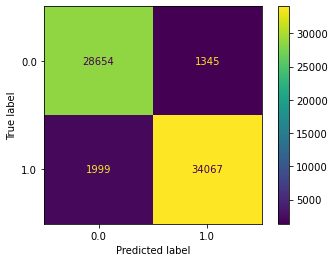

In [48]:
# Confusion Matrix: XGB GridSearch
print('XGB GridSearch: Train')
print("-----")
plot_confusion_matrix(xgb_grid,X_train,y_train);

In [49]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     29999
         1.0       0.96      0.94      0.95     36066

    accuracy                           0.95     66065
   macro avg       0.95      0.95      0.95     66065
weighted avg       0.95      0.95      0.95     66065



XGB GridSearch: Test
-----


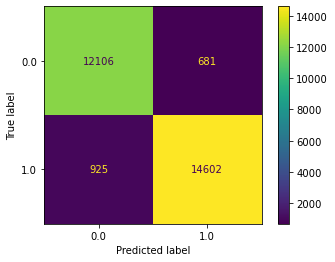

In [50]:
# Confusion Matrix: XGB GridSearch
print('XGB GridSearch: Test')
print("-----")
plot_confusion_matrix(xgb_grid,X_test,y_test);

In [51]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     12787
         1.0       0.96      0.94      0.95     15527

    accuracy                           0.94     28314
   macro avg       0.94      0.94      0.94     28314
weighted avg       0.94      0.94      0.94     28314



In [52]:
# Re-Load XGB GridSearch
xgb_model_final = XGBClassifier(random_state=1, eval_metric='logloss')

In [53]:
# XGB: GridSearch Params
n_estimators = np.arange(0,35,5)
reg_alpha = np.arange(0,35,5)
reg_lambda = np.arange(0,35,5)

xgb_param_grid = {'n_estimators':n_estimators,'reg_alpha':reg_alpha, 'reg_lambda':reg_lambda}

In [54]:
# XGB GridSearch
xgb_grid_final = GridSearchCV(xgb_model_final,xgb_param_grid,verbose=2)

In [55]:
# Fit Model To All Data
xgb_grid_final.fit(X,y)

Fitting 5 folds for each of 343 candidates, totalling 1715 fits
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=0; total time=   0.3s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=0; total time=   0.3s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=0; total time=   0.2s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=0; total time=   0.2s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=0; total time=   0.3s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=5; total time=   0.3s
[CV] END ..........n_estimators=0, reg_alpha=0, reg_lambda=5; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=0, reg_lambda=10; total time=   0.3s
[CV] END .........n_estimators=0, reg_alpha=0

[CV] END ........n_estimators=0, reg_alpha=10, reg_lambda=30; total time=   0.2s
[CV] END ........n_estimators=0, reg_alpha=10, reg_lambda=30; total time=   0.3s
[CV] END ........n_estimators=0, reg_alpha=10, reg_lambda=30; total time=   0.3s
[CV] END ........n_estimators=0, reg_alpha=10, reg_lambda=30; total time=   0.3s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=0; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=0; total time=   0.3s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=0; total time=   0.3s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=0; total time=   0.3s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=0; total time=   0.3s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=5; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=5; total time=   0.3s
[CV] END .........n_estimators=0, reg_alpha=15, reg_lambda=5; total time=   0.3s
[CV] END .........n_estimato

[CV] END ........n_estimators=0, reg_alpha=25, reg_lambda=25; total time=   0.3s
[CV] END ........n_estimators=0, reg_alpha=25, reg_lambda=25; total time=   0.3s
[CV] END ........n_estimators=0, reg_alpha=25, reg_lambda=30; total time=   0.2s
[CV] END ........n_estimators=0, reg_alpha=25, reg_lambda=30; total time=   0.3s
[CV] END ........n_estimators=0, reg_alpha=25, reg_lambda=30; total time=   0.2s
[CV] END ........n_estimators=0, reg_alpha=25, reg_lambda=30; total time=   0.3s
[CV] END ........n_estimators=0, reg_alpha=25, reg_lambda=30; total time=   0.3s
[CV] END .........n_estimators=0, reg_alpha=30, reg_lambda=0; total time=   0.3s
[CV] END .........n_estimators=0, reg_alpha=30, reg_lambda=0; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=30, reg_lambda=0; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=30, reg_lambda=0; total time=   0.2s
[CV] END .........n_estimators=0, reg_alpha=30, reg_lambda=0; total time=   0.2s
[CV] END .........n_estimato

[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=25; total time=   0.7s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=25; total time=   0.8s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=25; total time=   0.9s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=25; total time=   0.7s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=25; total time=   0.8s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=30; total time=   0.7s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=30; total time=   0.7s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=30; total time=   0.7s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=30; total time=   0.7s
[CV] END .........n_estimators=5, reg_alpha=5, reg_lambda=30; total time=   0.8s
[CV] END .........n_estimators=5, reg_alpha=10, reg_lambda=0; total time=   0.8s
[CV] END .........n_estimators=5, reg_alpha=10, reg_lambda=0; total time=   0.8s
[CV] END .........n_estimato

[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=20; total time=   0.8s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=20; total time=   0.8s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=20; total time=   0.8s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=25; total time=   0.7s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=25; total time=   0.8s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=25; total time=   0.9s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=25; total time=   0.8s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=25; total time=   0.8s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=30; total time=   0.8s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=30; total time=   0.8s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=30; total time=   0.7s
[CV] END ........n_estimators=5, reg_alpha=20, reg_lambda=30; total time=   0.7s
[CV] END ........n_estimator

[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=15; total time=   1.4s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=20; total time=   1.3s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=20; total time=   1.3s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=20; total time=   1.2s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=20; total time=   1.2s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=20; total time=   1.2s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=25; total time=   1.2s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=25; total time=   1.3s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=25; total time=   1.4s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=25; total time=   1.2s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=25; total time=   1.2s
[CV] END ........n_estimators=10, reg_alpha=0, reg_lambda=30; total time=   1.2s
[CV] END ........n_estimator

[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=15; total time=   1.4s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=15; total time=   1.3s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=15; total time=   1.6s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=15; total time=   1.3s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=20; total time=   1.4s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=20; total time=   1.4s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=20; total time=   1.4s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=20; total time=   1.3s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=20; total time=   1.6s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=25; total time=   1.4s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=25; total time=   1.3s
[CV] END .......n_estimators=10, reg_alpha=15, reg_lambda=25; total time=   1.4s
[CV] END .......n_estimators

[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=10; total time=   1.3s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=10; total time=   1.4s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=15; total time=   1.4s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=15; total time=   1.4s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=15; total time=   1.3s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=15; total time=   1.3s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=15; total time=   1.4s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=20; total time=   1.3s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=20; total time=   1.4s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=20; total time=   1.2s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=20; total time=   1.3s
[CV] END .......n_estimators=10, reg_alpha=30, reg_lambda=20; total time=   1.2s
[CV] END .......n_estimators

[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=10; total time=   1.8s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=10; total time=   1.7s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=10; total time=   1.8s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=10; total time=   1.8s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=10; total time=   1.7s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=15; total time=   1.7s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=15; total time=   1.7s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=15; total time=   1.7s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=15; total time=   1.6s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=15; total time=   1.7s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=20; total time=   1.9s
[CV] END .......n_estimators=15, reg_alpha=10, reg_lambda=20; total time=   1.9s
[CV] END .......n_estimators

[CV] END ........n_estimators=15, reg_alpha=25, reg_lambda=5; total time=   1.9s
[CV] END ........n_estimators=15, reg_alpha=25, reg_lambda=5; total time=   1.7s
[CV] END ........n_estimators=15, reg_alpha=25, reg_lambda=5; total time=   1.8s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=10; total time=   1.7s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=10; total time=   1.7s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=10; total time=   1.7s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=10; total time=   1.8s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=10; total time=   1.7s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=15; total time=   1.8s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=15; total time=   1.7s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=15; total time=   1.7s
[CV] END .......n_estimators=15, reg_alpha=25, reg_lambda=15; total time=   1.9s
[CV] END .......n_estimators

[CV] END .........n_estimators=20, reg_alpha=5, reg_lambda=0; total time=   2.3s
[CV] END .........n_estimators=20, reg_alpha=5, reg_lambda=5; total time=   2.5s
[CV] END .........n_estimators=20, reg_alpha=5, reg_lambda=5; total time=   2.5s
[CV] END .........n_estimators=20, reg_alpha=5, reg_lambda=5; total time=   2.5s
[CV] END .........n_estimators=20, reg_alpha=5, reg_lambda=5; total time=   2.4s
[CV] END .........n_estimators=20, reg_alpha=5, reg_lambda=5; total time=   2.3s
[CV] END ........n_estimators=20, reg_alpha=5, reg_lambda=10; total time=   2.2s
[CV] END ........n_estimators=20, reg_alpha=5, reg_lambda=10; total time=   2.3s
[CV] END ........n_estimators=20, reg_alpha=5, reg_lambda=10; total time=   2.2s
[CV] END ........n_estimators=20, reg_alpha=5, reg_lambda=10; total time=   2.4s
[CV] END ........n_estimators=20, reg_alpha=5, reg_lambda=10; total time=   2.4s
[CV] END ........n_estimators=20, reg_alpha=5, reg_lambda=15; total time=   2.3s
[CV] END ........n_estimator

[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=0; total time=   2.2s
[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=0; total time=   2.2s
[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=0; total time=   2.2s
[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=0; total time=   2.3s
[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=5; total time=   2.3s
[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=5; total time=   2.4s
[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=5; total time=   2.2s
[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=5; total time=   2.3s
[CV] END ........n_estimators=20, reg_alpha=20, reg_lambda=5; total time=   2.6s
[CV] END .......n_estimators=20, reg_alpha=20, reg_lambda=10; total time=   2.2s
[CV] END .......n_estimators=20, reg_alpha=20, reg_lambda=10; total time=   2.2s
[CV] END .......n_estimators=20, reg_alpha=20, reg_lambda=10; total time=   2.2s
[CV] END .......n_estimators

[CV] END .......n_estimators=20, reg_alpha=30, reg_lambda=30; total time=   2.2s
[CV] END .......n_estimators=20, reg_alpha=30, reg_lambda=30; total time=   2.2s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=0; total time=   2.6s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=0; total time=   2.7s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=0; total time=   2.6s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=0; total time=   2.6s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=0; total time=   2.7s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=5; total time=   2.8s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=5; total time=   2.7s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=5; total time=   2.6s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=5; total time=   2.6s
[CV] END .........n_estimators=25, reg_alpha=0, reg_lambda=5; total time=   2.7s
[CV] END ........n_estimator

[CV] END .......n_estimators=25, reg_alpha=10, reg_lambda=30; total time=   2.7s
[CV] END .......n_estimators=25, reg_alpha=10, reg_lambda=30; total time=   3.0s
[CV] END .......n_estimators=25, reg_alpha=10, reg_lambda=30; total time=   2.8s
[CV] END .......n_estimators=25, reg_alpha=10, reg_lambda=30; total time=   2.6s
[CV] END .......n_estimators=25, reg_alpha=10, reg_lambda=30; total time=   2.8s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=0; total time=   2.9s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=0; total time=   3.0s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=0; total time=   3.3s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=0; total time=   2.8s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=0; total time=   2.5s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=5; total time=   2.6s
[CV] END ........n_estimators=25, reg_alpha=15, reg_lambda=5; total time=   2.7s
[CV] END ........n_estimator

[CV] END .......n_estimators=25, reg_alpha=25, reg_lambda=25; total time=   2.6s
[CV] END .......n_estimators=25, reg_alpha=25, reg_lambda=25; total time=   2.6s
[CV] END .......n_estimators=25, reg_alpha=25, reg_lambda=25; total time=   2.7s
[CV] END .......n_estimators=25, reg_alpha=25, reg_lambda=30; total time=   2.7s
[CV] END .......n_estimators=25, reg_alpha=25, reg_lambda=30; total time=   2.7s
[CV] END .......n_estimators=25, reg_alpha=25, reg_lambda=30; total time=   2.6s
[CV] END .......n_estimators=25, reg_alpha=25, reg_lambda=30; total time=   2.6s
[CV] END .......n_estimators=25, reg_alpha=25, reg_lambda=30; total time=   2.6s
[CV] END ........n_estimators=25, reg_alpha=30, reg_lambda=0; total time=   2.7s
[CV] END ........n_estimators=25, reg_alpha=30, reg_lambda=0; total time=   2.6s
[CV] END ........n_estimators=25, reg_alpha=30, reg_lambda=0; total time=   2.5s
[CV] END ........n_estimators=25, reg_alpha=30, reg_lambda=0; total time=   2.5s
[CV] END ........n_estimator

[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=20; total time=   3.0s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=25; total time=   3.1s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=25; total time=   3.2s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=25; total time=   3.1s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=25; total time=   3.4s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=25; total time=   3.2s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=30; total time=   3.1s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=30; total time=   3.1s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=30; total time=   3.2s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=30; total time=   3.4s
[CV] END ........n_estimators=30, reg_alpha=5, reg_lambda=30; total time=   3.3s
[CV] END ........n_estimators=30, reg_alpha=10, reg_lambda=0; total time=   3.1s
[CV] END ........n_estimator

[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=20; total time=   3.2s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=20; total time=   3.2s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=20; total time=   3.3s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=20; total time=   3.4s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=25; total time=   3.5s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=25; total time=   3.6s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=25; total time=   3.3s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=25; total time=   3.4s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=25; total time=   3.3s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=30; total time=   3.2s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=30; total time=   3.1s
[CV] END .......n_estimators=30, reg_alpha=20, reg_lambda=30; total time=   3.2s
[CV] END .......n_estimators

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=N

In [56]:
# Final XGB GridSearchBest Params
xgb_grid_final.best_params_

{'n_estimators': 30, 'reg_alpha': 0, 'reg_lambda': 0}

In [57]:
# XGB GridSearch Final Predictions
y_pred_final = xgb_grid_final.predict(df_test)

In [58]:
# XGB GridSearch Final Predictions: Dataframe
y_pred_final = pd.DataFrame(y_pred_final).copy()

In [59]:
# Rename Column
y_pred_final.rename(columns={0:'Overall_Experience'},inplace=True)

In [60]:
# Random XGB GridSearch: Final Submission
submit_xgb_grid = Submission.copy()

In [61]:
# Random Forest GridSearch: Final Submission: Combined
submit_xgb_grid['Overall_Experience'] = y_pred_final['Overall_Experience'].values

In [62]:
# Export Submission: Random Forest GridSearch
submit_xgb_grid.to_csv("./data/submission_data/submission_xgb_grid.csv")

**Observations:**
 - **RandomForest Outperforms XGBBoost by +1% Accuracy.** 
  - RandomForest Accurracy (Test Data): 95%
  - XGBBoost Accurracy (Test Data): 94%
 - **Next Steps**: Test Other Params Into XGB & Try Neural Network Model.